# Multiple Linear Regression Bike Sharing Assignment 
#### by Sahil Pattiwar 

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Step 1: Importing Libraries


In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading  and Understanding Data

In [2]:
#Read the csv file using pandas
bike_df = pd.read_csv('day.csv')

In [3]:
# check the Database columns
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_df.shape

(730, 16)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No Missing Values 

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

We can see data is of (730, 16) shape and No Null values

## Step 3: Cleaning Data

- `casual` and `registered`cannot be identified during projection and target variable `cnt` is  `target = casual + registered` so we can dropp `casual` & `registered`
- `dteday` can be  removed as we have some of date features like `mnth` and `year` and `weekday` also days series can be referenced from index `instant`

In [8]:
# Dropping dteday as we have already have month and weekday columns to work with
bike_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
bike_df.drop(['casual'], axis = 1, inplace = True)
bike_df.drop(['registered'], axis = 1, inplace = True)

In [9]:
#Inspect data frame after dropping
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Checking for outliers

In [10]:
bike_df.columns    

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [11]:
cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

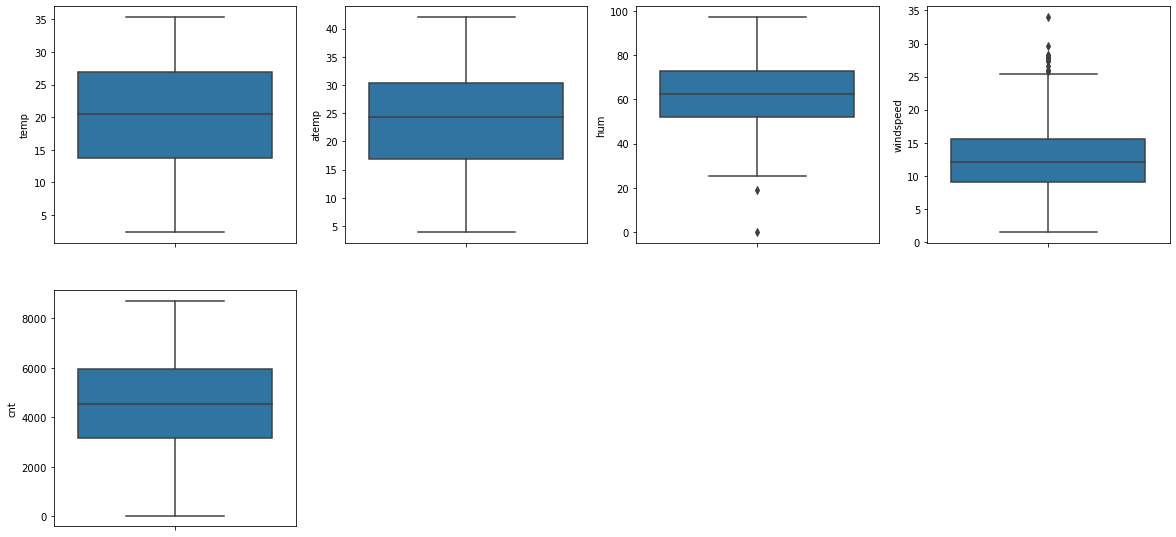

In [12]:
plt.figure(figsize=(20,20))

i = 1
for col in cols:
    plt.subplot(4,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

No Major Ourliers Data is goot till now

### Data Is Now Ready for analysis 

In [13]:
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Update Data with 
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## 4. EDA

#### 4.1 Convert season and  weathersit to categorical types

In [14]:
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


#### 4.2 Draw pair Plots to check the linear relationship

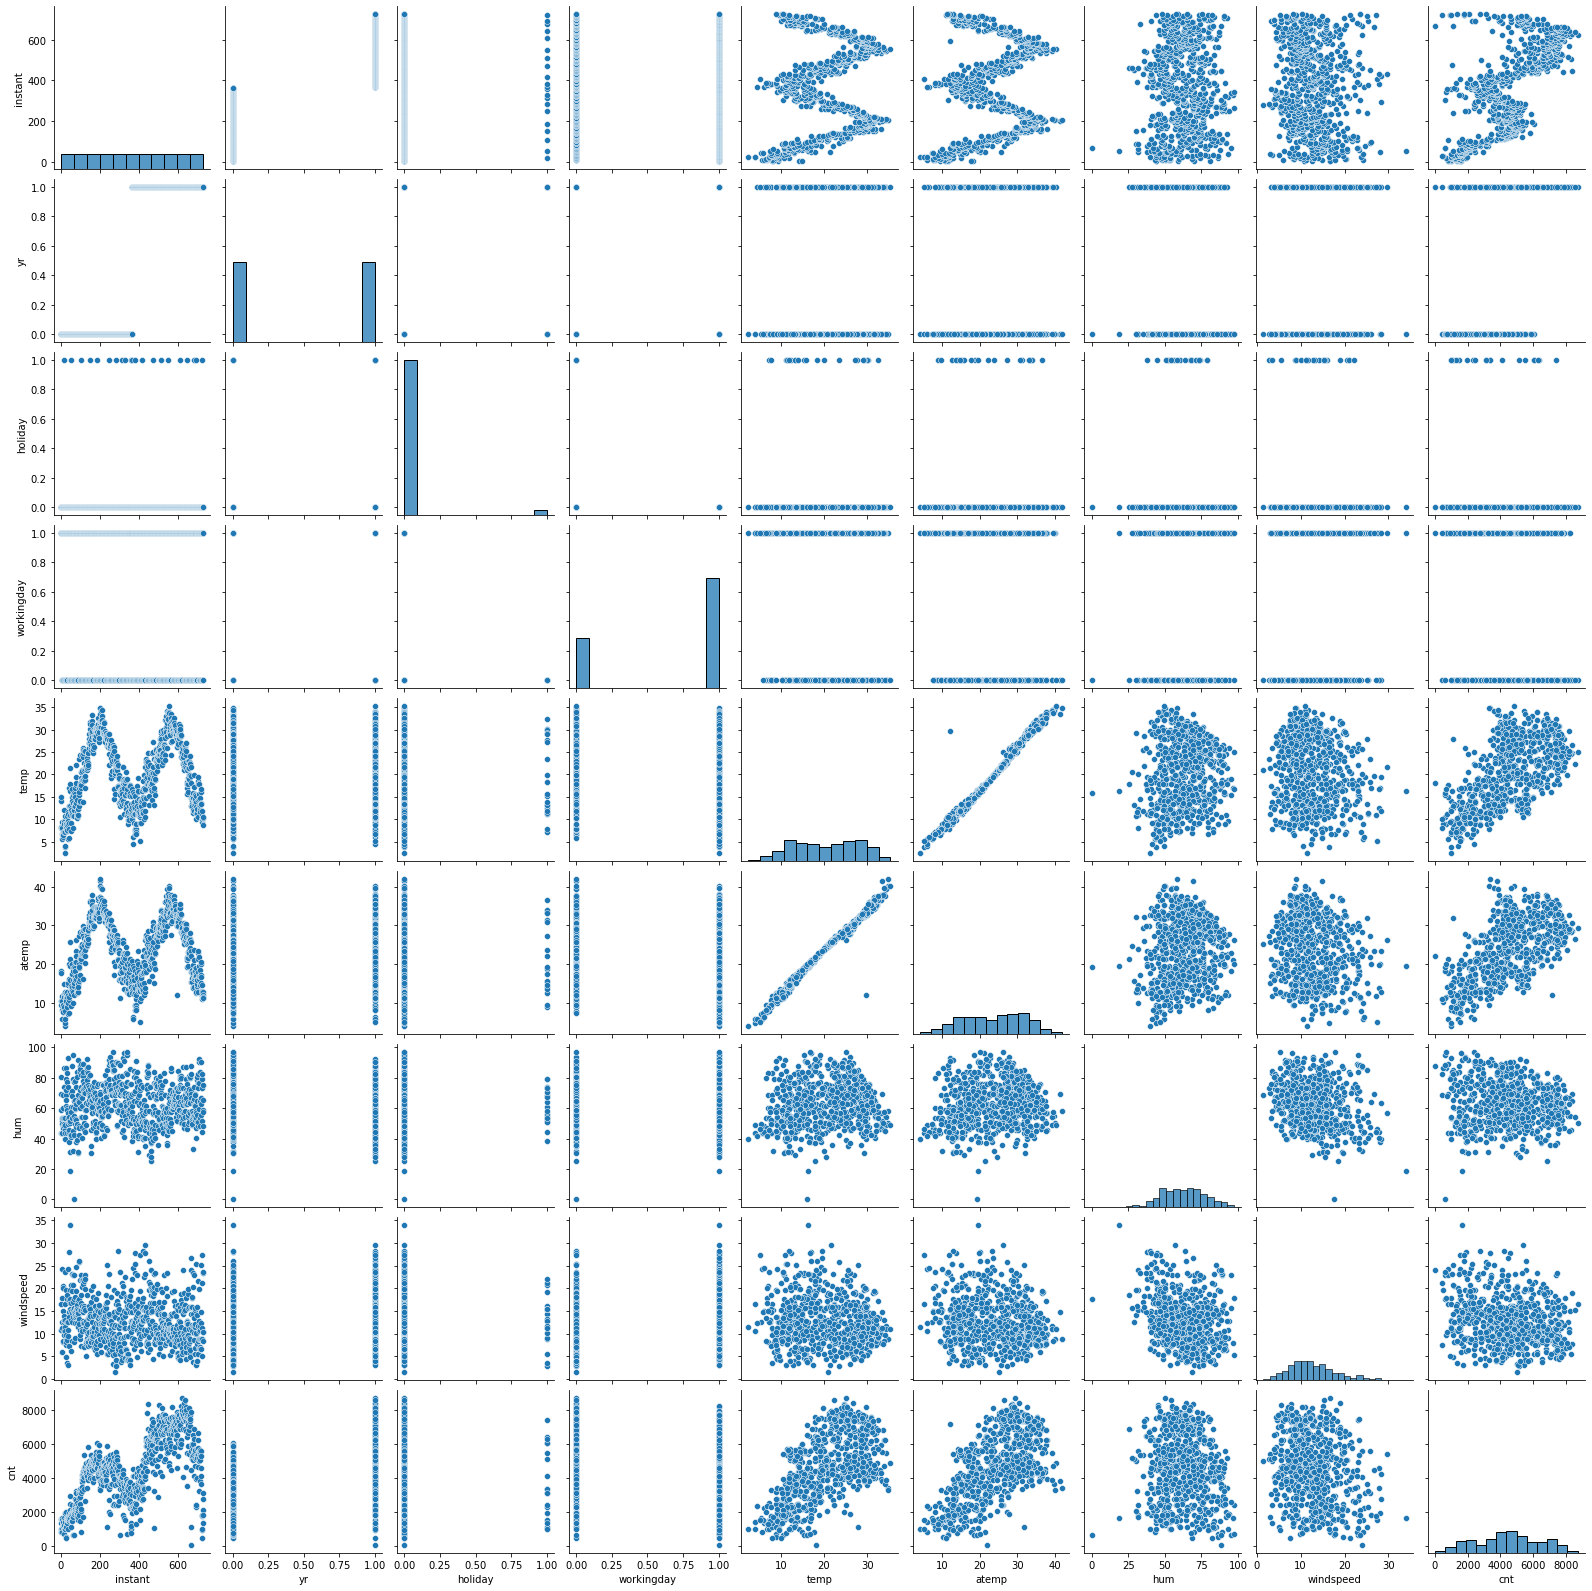

In [15]:
#Draw pairplots for DF
sns.pairplot(bike_df)
plt.show()

#### _`Inference`_: 
- Looks like the temp and atemp has the highest corelation with the target variable cnt


#### 4.3 Draw Heatmap of correlation between variables

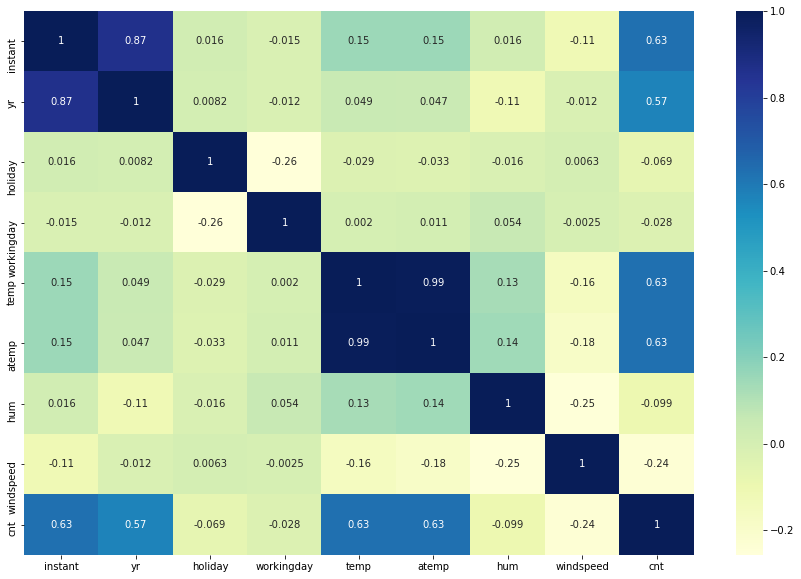

In [16]:
#Calculate Correlation

plt.figure(figsize=(15,10))

#Draw Heatmap of correlation
sns.heatmap(bike_df.corr(),annot=True, cmap='YlGnBu' )
plt.show()

#### Here we see that temp and atemp has correlation more than .99 ie. it can be dropped as it will be not relevent for our model

#### We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

In [17]:
bike_df.drop(['temp'], axis = 1, inplace = True)

#### 4.4 Analysing Categorical Variabels with target variables 

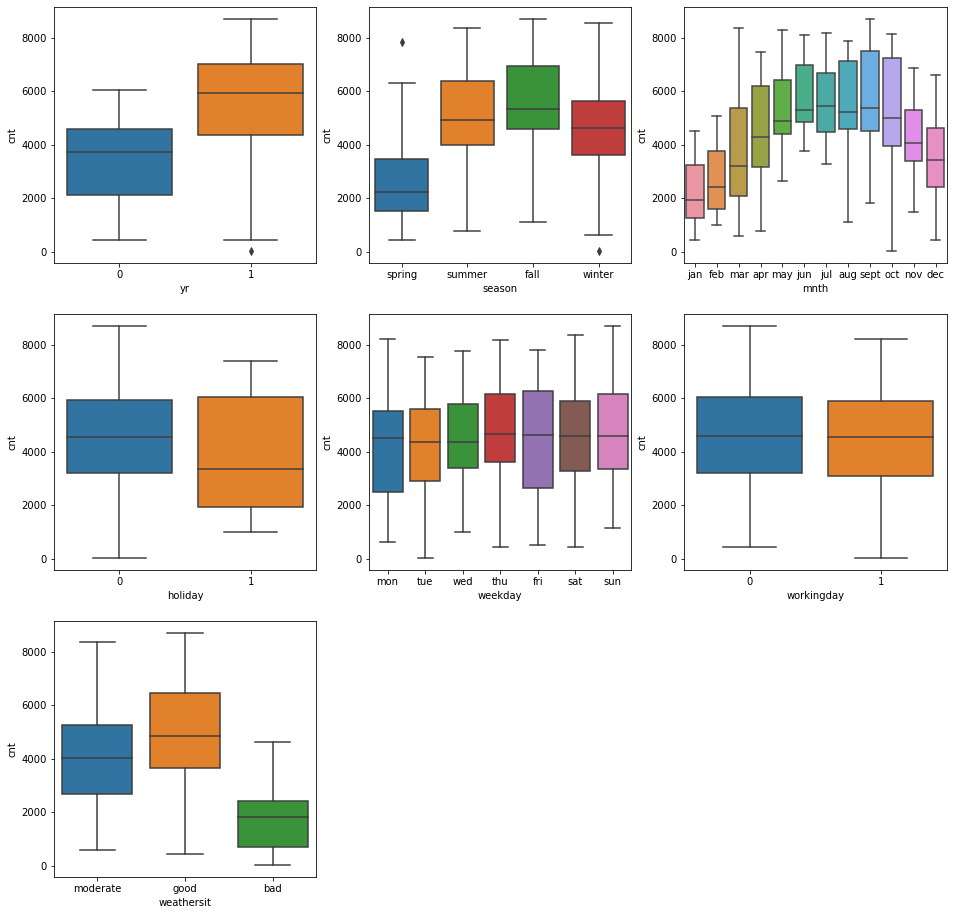

In [18]:
# Boxplot for categorical variables to see demands
cat_vars = ['yr','season','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(16, 16))
for i in enumerate(cat_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

#### _`Inference`_:

    1. Season: 3:fall has highest demand for bikes
    2. we can  see that demand for 2019  has incresed 
    3. Demand is continuously growing each month till June. September month has highest demand.After  demand is decreasing
    4. for holiday demand is bit lower
    5. Weekday is not giving clear idea of demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

#### 4.5 Analysing Numerical Variabels with target variables 

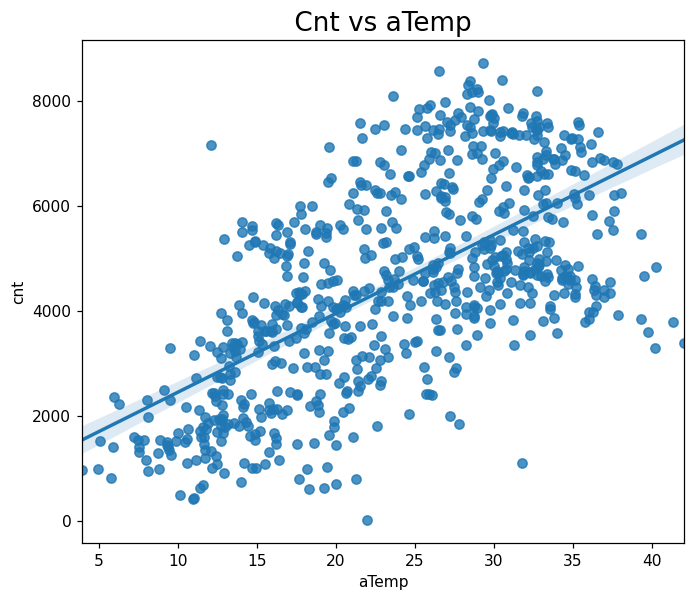

In [19]:
plt.figure(figsize=(7,6),dpi=111)
plt.title(" Cnt vs aTemp ",fontsize=17)
sns.regplot(data=bike_df,x="atemp",y="cnt")
plt.xlabel("aTemp")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

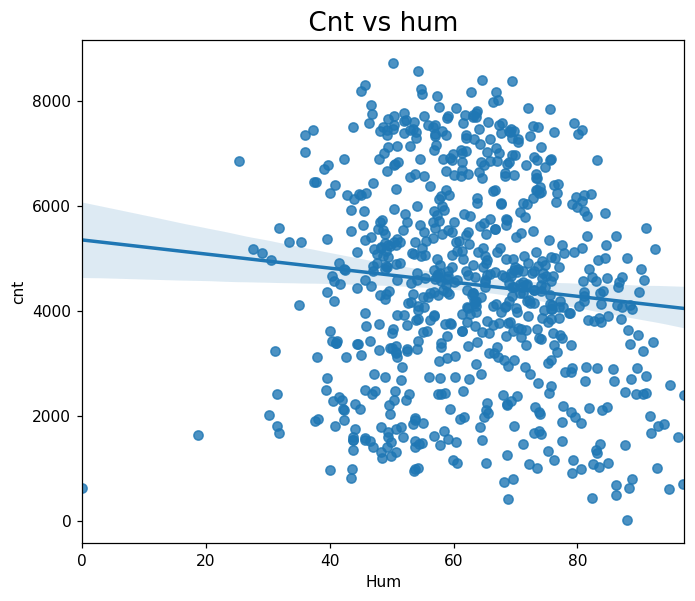

In [20]:
plt.figure(figsize=(7,6),dpi=111)
plt.title(" Cnt vs hum ",fontsize=17)
sns.regplot(data=bike_df,x="hum",y="cnt")
plt.xlabel("Hum")
plt.show()

#### _`Inference`_:
- Hum is values are more scattered around.
- though we can see cnt decreasing with increase in humidity.

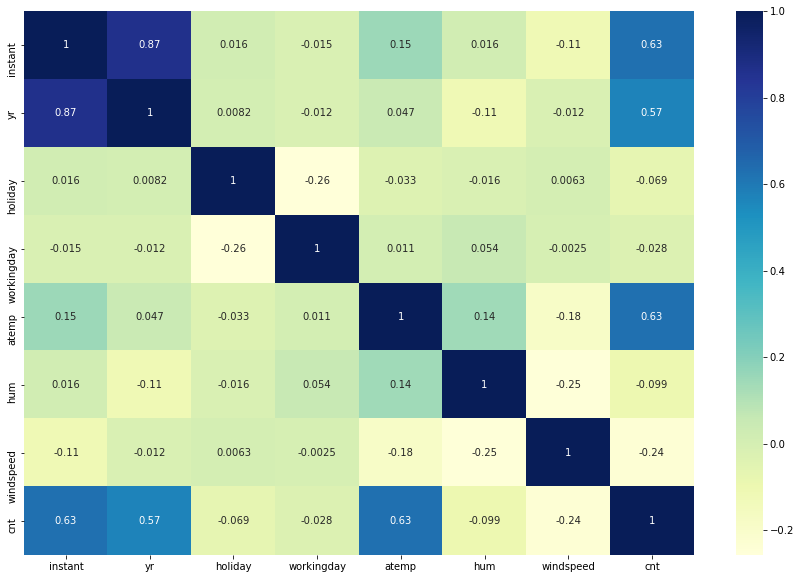

In [21]:
#Calculate Correlation

plt.figure(figsize=(15,10))

#Draw Heatmap of correlation
sns.heatmap(bike_df.corr(),annot=True, cmap='YlGnBu' )
plt.show()

# 5. Data Preparation for Linear Regression 

In [22]:
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,spring,0,jan,0,mon,1,moderate,18.18125,80.5833,10.749882,985
1,2,spring,0,jan,0,tue,1,moderate,17.68695,69.6087,16.652113,801
2,3,spring,0,jan,0,wed,1,good,9.47025,43.7273,16.636703,1349
3,4,spring,0,jan,0,thu,1,good,10.60610,59.0435,10.739832,1562
4,5,spring,0,jan,0,fri,1,good,11.46350,43.6957,12.522300,1600


#### 5.1 Create dummy variables for all categorical variables

In [23]:
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"])
bike_df = pd.get_dummies(data=bike_df,columns=["mnth","season","weekday"],drop_first=True)
#Print columns after creating dummies
bike_df.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'cnt', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'season_spring', 'season_summer', 'season_winter', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [24]:
bike_df.head()

,instant,yr,holiday,workingday,atemp,hum,windspeed,cnt,weathersit_bad,weathersit_good,...,mnth_sept,season_spring,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,1,0,0,1,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,0,0,1,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,0,0,1,0
2,3,0,0,1,9.47025,43.7273,16.636703,1349,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,0,0,1,10.60610,59.0435,10.739832,1562,0,1,...,0,1,0,0,0,0,0,1,0,0
4,5,0,0,1,11.46350,43.6957,12.522300,1600,0,1,...,0,1,0,0,0,0,0,0,0,0


#### 5.2 Splitting the Data into Training and Testing Sets

In [25]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(10)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 123)

#### 5.3 Feature Scaling continuous variables
Min-Max scaling 

In [26]:
scaler = MinMaxScaler()
vars_col = ['atemp','hum','windspeed','instant','cnt' ]
df_train[vars_col] = scaler.fit_transform(df_train[vars_col])


In [27]:
df_train.head()

,instant,yr,holiday,workingday,atemp,hum,windspeed,cnt,weathersit_bad,weathersit_good,...,mnth_sept,season_spring,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
689,0.946429,1,0,1,0.382473,0.631105,0.131013,0.600492,0,1,...,0,0,0,1,0,0,0,1,0,0
406,0.557692,1,0,1,0.176364,0.751928,0.532059,0.251611,1,0,...,0,1,0,0,1,0,0,0,0,0
299,0.410714,0,0,0,0.505788,0.835904,0.334206,0.309036,0,0,...,0,0,0,1,0,1,0,0,0,0
142,0.195055,0,0,1,0.684097,0.832905,0.411769,0.498301,0,0,...,0,0,1,0,0,0,0,0,0,1
275,0.377747,0,0,1,0.418809,0.782348,0.088231,0.415797,0,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
df_train.describe()

,instant,yr,holiday,workingday,atemp,hum,windspeed,cnt,weathersit_bad,weathersit_good,...,mnth_sept,season_spring,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505554,0.523529,0.037255,0.694118,0.514277,0.633319,0.322474,0.524341,0.033333,0.654902,...,0.070588,0.272549,0.254902,0.235294,0.145098,0.127451,0.145098,0.141176,0.135294,0.145098
std,0.292735,0.499936,0.189572,0.461233,0.218066,0.146670,0.165343,0.234835,0.179682,0.475867,...,0.256387,0.445708,0.436234,0.424599,0.352545,0.333805,0.352545,0.348545,0.342373,0.352545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248626,0.000000,0.000000,0.000000,0.327562,0.520835,0.203184,0.357055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.521291,1.000000,0.000000,1.000000,0.525660,0.631320,0.302796,0.534279,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.751030,1.000000,0.000000,1.000000,0.691717,0.736462,0.411435,0.710887,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.4 Dividing into X and Y sets for the model building

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

# 6. Model Building

### 6.1 Start with all variables selected by RFE

In [30]:
len(bike_df.columns)

31

In [31]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
#Cut down number of features to 18 using automated approach
rfe = RFE(lr,18)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=18)

In [33]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 7),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 8),
 ('mnth_jun', True, 1),
 ('mnth_mar', False, 10),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 13),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 9)]

In [34]:
X_train.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'season_spring',
       'season_summer', 'season_winter', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [35]:
X_train.columns[rfe.support_]

Index(['instant', 'yr', 'holiday', 'atemp', 'hum', 'windspeed',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'season_spring', 'season_winter'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'season_summer', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [37]:
print(len(X_train.columns))
print(len(X_train.columns[rfe.support_]))
print(len(X_train.columns[~rfe.support_]))

30
18
12


##### Function to build a model using statsmodel api

In [38]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def lr_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [39]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def lr_vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Model # 0 All Varibles 

In [40]:
col=   ['instant', 'yr', 'holiday', 'atemp', 'hum', 'windspeed',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'season_spring', 'season_winter']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     163.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          7.70e-190
Time:                        02:25:24   Log-Likelihood:                 498.92
No. Observations:                 510   AIC:                            -961.8
Df Residuals:                     492   BIC:                            -885.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2515    

## Model 1

In [41]:
# Dropping the variable weathersit_bad as insignificant as it has high p-value
col=   ['instant', 'yr', 'holiday', 'atemp', 'hum', 'windspeed',
        'weathersit_good', 'weathersit_moderate', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'season_spring', 'season_winter']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     163.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          7.70e-190
Time:                        02:25:24   Log-Likelihood:                 498.92
No. Observations:                 510   AIC:                            -961.8
Df Residuals:                     492   BIC:                            -885.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2169    

## Model 2


In [42]:
# Dropping the variable instant  as it has high VIF
col=   [ 'yr', 'holiday', 'atemp', 'hum', 'windspeed',
        'weathersit_good', 'weathersit_moderate', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'season_spring', 'season_winter']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.7
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          5.67e-186
Time:                        02:25:24   Log-Likelihood:                 486.96
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     493   BIC:                            -867.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1735    

## Model 2

In [43]:
# Dropping the variable mnth_feb  as it has high P-val
col=   [ 'yr', 'holiday', 'atemp', 'hum', 'windspeed',
        'weathersit_good', 'weathersit_moderate', 'mnth_aug',
        'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'season_spring', 'season_winter']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.8
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          5.75e-187
Time:                        02:25:24   Log-Likelihood:                 486.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     494   BIC:                            -873.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1713    

## Model 3

In [44]:
# Dropping the variable mnth_aug  as it has high P-val
col=   [ 'yr', 'holiday', 'atemp', 'hum', 'windspeed',
        'weathersit_good', 'weathersit_moderate', 
        'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'season_spring', 'season_winter']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.00e-187
Time:                        02:25:24   Log-Likelihood:                 485.71
No. Observations:                 510   AIC:                            -941.4
Df Residuals:                     495   BIC:                            -877.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1710    

## Model 4

In [45]:
# Dropping the variable hum  as it has high vif
col=   [ 'yr', 'holiday', 'atemp', 'windspeed',
        'weathersit_good', 'weathersit_moderate', 
        'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'season_spring', 'season_winter']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.4
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.31e-184
Time:                        02:25:24   Log-Likelihood:                 475.54
No. Observations:                 510   AIC:                            -923.1
Df Residuals:                     496   BIC:                            -863.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0154    

## Model 5

In [46]:
# Dropping the variable season_winter  as it has high P-val
col=   [ 'yr', 'holiday', 'atemp', 'windspeed',
        'weathersit_good', 'weathersit_moderate', 
        'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'season_spring']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.1
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.93e-185
Time:                        02:25:24   Log-Likelihood:                 474.74
No. Observations:                 510   AIC:                            -923.5
Df Residuals:                     497   BIC:                            -868.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0385    

## Model 6

In [47]:
# Dropping the variable mnth_may  as it has high p-val
col=   [ 'yr', 'holiday', 'atemp', 'windspeed',
        'weathersit_good', 'weathersit_moderate', 
        'mnth_jan', 'mnth_jun', 'mnth_oct', 'mnth_sept',
       'season_spring']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.4
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          3.71e-186
Time:                        02:25:24   Log-Likelihood:                 473.62
No. Observations:                 510   AIC:                            -923.2
Df Residuals:                     498   BIC:                            -872.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0374    

## Model 7

In [48]:
# Dropping the variable mnth_jun as it has high P-val
col=   [ 'yr', 'holiday', 'atemp', 'windspeed',
        'weathersit_good', 'weathersit_moderate', 
        'mnth_jan',  'mnth_oct', 'mnth_sept',
       'season_spring']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.9
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          9.58e-187
Time:                        02:25:24   Log-Likelihood:                 472.15
No. Observations:                 510   AIC:                            -922.3
Df Residuals:                     499   BIC:                            -875.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0325    

## Model 8

In [49]:
# Dropping the variable  weathersit_good as it has high vif
col=   [ 'yr', 'holiday', 'atemp', 'windspeed',
         'weathersit_moderate', 
        'mnth_jan',  'mnth_oct', 'mnth_sept',
       'season_spring']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     218.0
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          8.19e-167
Time:                        02:25:24   Log-Likelihood:                 422.28
No. Observations:                 510   AIC:                            -824.6
Df Residuals:                     500   BIC:                            -782.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2711    

## Model 9

In [50]:
# Adding  the variable  weathersit_bad as it has high seems relevent with data .
col=   [ 'yr', 'holiday', 'atemp', 'windspeed',
         'weathersit_moderate', 
        'mnth_jan',  'mnth_oct', 'mnth_sept',
       'season_spring','weathersit_bad']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.9
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          9.58e-187
Time:                        02:25:25   Log-Likelihood:                 472.15
No. Observations:                 510   AIC:                            -922.3
Df Residuals:                     499   BIC:                            -875.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2904    

## Model 10

In [51]:
# Dropping the variable  mnth_jan as it has high P-val .
col=   [ 'yr', 'holiday', 'atemp', 'windspeed',
         'weathersit_moderate'
        , 'mnth_oct', 'mnth_sept',
       'season_spring','weathersit_bad']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     275.2
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          2.27e-187
Time:                        02:25:25   Log-Likelihood:                 470.71
No. Observations:                 510   AIC:                            -921.4
Df Residuals:                     500   BIC:                            -879.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2848    

##### After trying multiple iteration and combination of previously dropped varible its observed that adding weekday_mon , weekday_tue dose not increse P-val and Vif out of accetable range but also incres our required        - R-squared & -Adj. R-squared

## Model 11

In [52]:
# Adding the variable  'weekday_mon','weekday_tue'
col=   [ 'weekday_mon','weekday_tue','yr', 'holiday', 'atemp', 'windspeed',
         'weathersit_moderate'
        , 'mnth_oct', 'mnth_sept',
       'season_spring','weathersit_bad']
lr_model(col)
lr_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.1
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          2.11e-188
Time:                        02:25:25   Log-Likelihood:                 478.93
No. Observations:                 510   AIC:                            -933.9
Df Residuals:                     498   BIC:                            -883.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2937    

#### `_Inference`_
- Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and max is 0.028 which is less than 0.05 and R2 is 0.834 
- Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
- Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [53]:
#Build a model with all columns to select features automatically
def build_model_final(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [54]:
#Let us build the finalmodel using sklearn
col=   [ 'weekday_mon','weekday_tue','yr', 'holiday', 'atemp', 'windspeed',
         'weathersit_moderate', 'mnth_oct', 'mnth_sept','season_spring','weathersit_bad']

#Build a model with above columns
lr = build_model_final(X_train[col],y_train)
print(lr.intercept_,lr.coef_)

0.2936791644203802 [-0.02702721 -0.04665394  0.24233454 -0.07543066  0.40822427 -0.10127555
 -0.07348533  0.07335841  0.07639268 -0.14778689 -0.26069838]


## Step 7. Model Evaluation 
### 7.1 Residucal Analysis

In [55]:
y_train_pred = lr.predict(X_train[col])

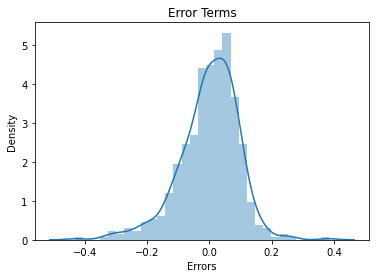

In [56]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_res_dist(y_train, y_train_pred)

Text(0.5, 0, 'Errors')

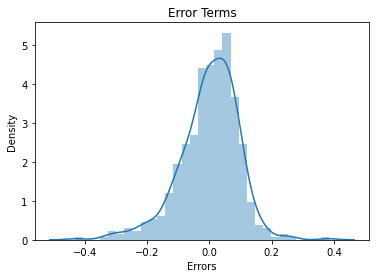

In [57]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

####  So everything seems to be fine as Errors are normally distribured here with mean 0.

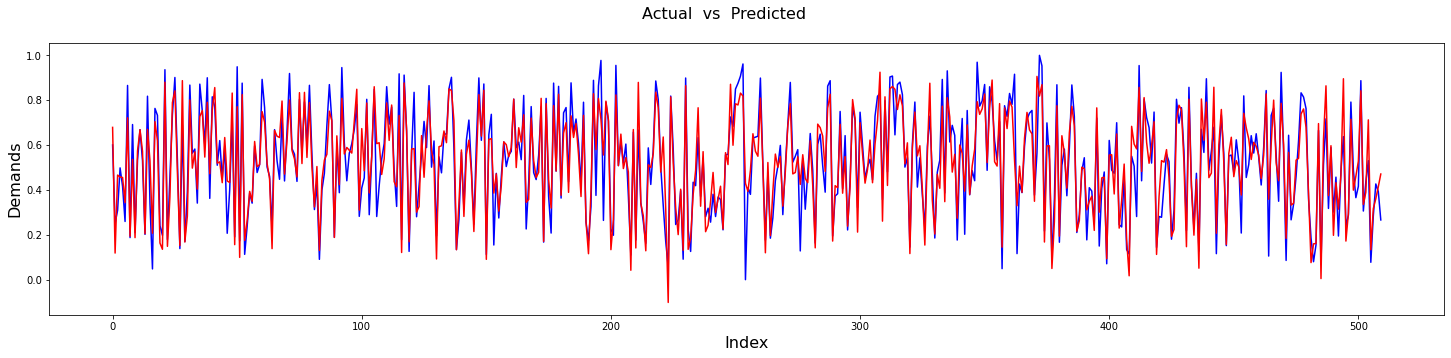

In [58]:
# Actual vs Predicted
plt.figure(figsize=(25,5))
z = [i for i in range(0,len(X_train),1)]
plt.plot(z,y_train, color="b")
plt.plot(z,y_train_pred, color="r")
plt.suptitle('Actual  vs  Predicted', fontsize = 16)
plt.xlabel('Index',fontsize = 16)
plt.ylabel('Demands',fontsize = 16)
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems Suitable

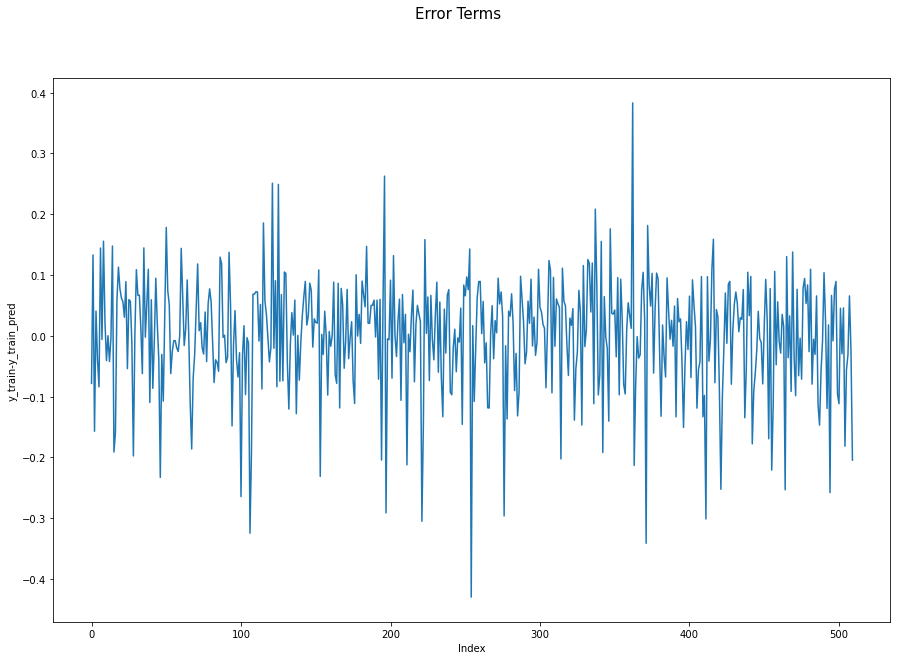

In [59]:
# Error Terms
plt.figure(figsize=(15,10))
z = [i for i in range(0,len(X_train),1)]
plt.plot(z,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.


In [60]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8373782509288216

### 7.2 Linearity Check

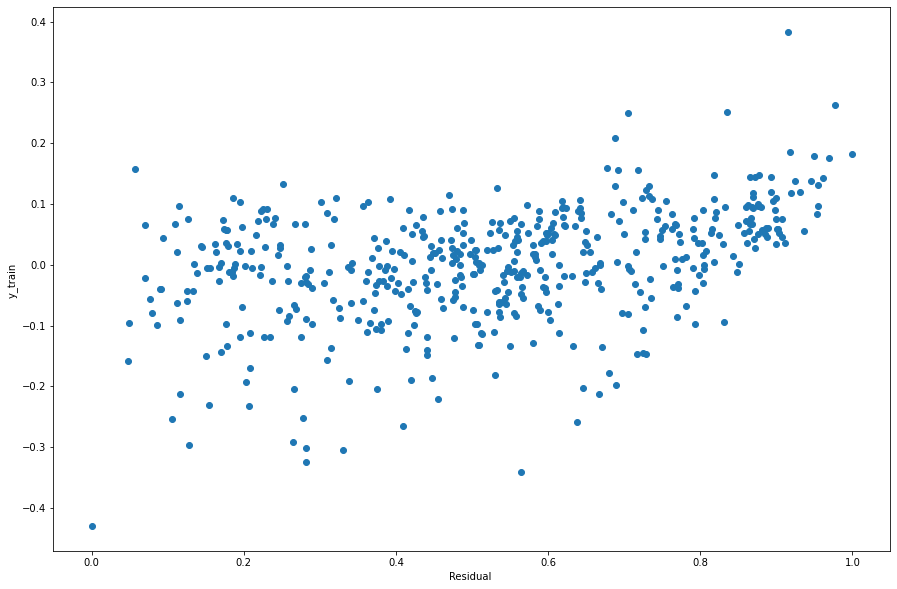

In [61]:
# scatter plot for the check
plt.figure(figsize=(15,10))
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train ")
plt.xlabel("Residual ")
plt.show()

### 7.3 Predict values for test data set

#### Applying the scaling on the test sets

In [62]:
#Scale variables in test dataset
vars_col = ['atemp','hum','windspeed','instant','cnt' ]

#Test data to be transformed only, no fitting
df_test[vars_col] = scaler.transform(df_test[vars_col])

#### Dividing into X_test and y_test


In [63]:
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
col=   [ 'weekday_mon','weekday_tue','yr', 'holiday', 'atemp', 'windspeed',
         'weathersit_moderate', 'mnth_oct', 'mnth_sept','season_spring','weathersit_bad']


#Predict the values for test data
y_test_pred = lr.predict(X_test[col])

### 7.4 R-Squared value for test predictions

In [65]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7951923858103358

### 7.5 Homoscedacity

##### _`Inference`_ 
R2 value for predictions on test data (0.837) is closer to R2 value of train data(0.795). This is a good R-squared value, hence we can see our model is good at predictions on test data

Text(0, 0.5, 'y_test_pred')

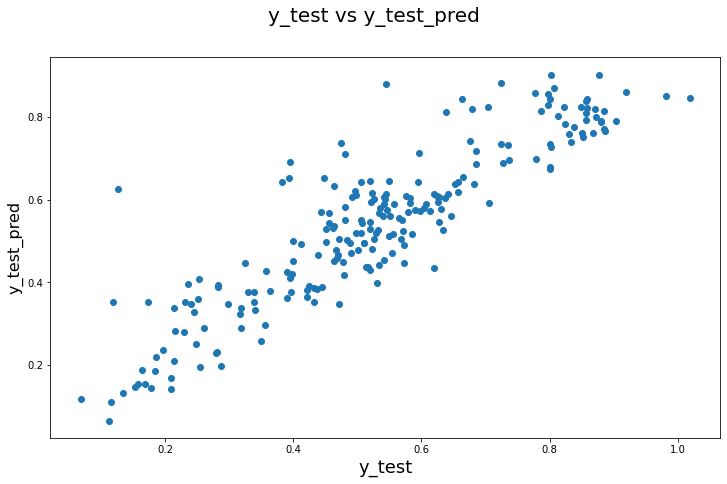

In [66]:
# Plotting y_test and y_test_pred to understand the spread

plt.figure(figsize=(12,7))
plt.scatter(y_test, y_test_pred)
plt.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

####  _`Inference`_
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

### 7.8 Plot Test vs Predicted test values

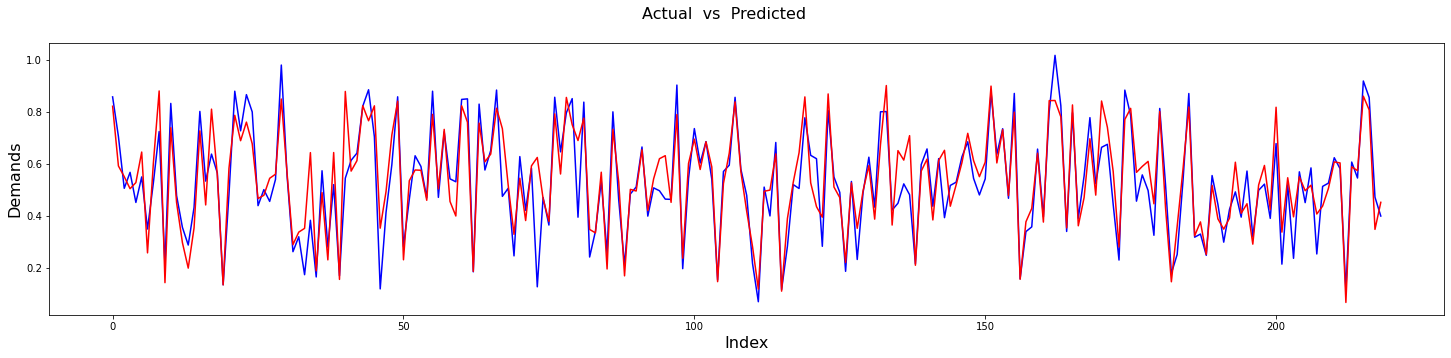

In [67]:
# Actual vs Predicted
plt.figure(figsize=(25,5))
z = [i for i in range(0,len(y_test),1)]
plt.plot(z,y_test, color="b")
plt.plot(z,y_test_pred, color="r")
plt.suptitle('Actual  vs  Predicted', fontsize = 16)
plt.xlabel('Index',fontsize = 16)
plt.ylabel('Demands',fontsize = 16)
plt.show()

#### _`Inference`_
As we can see predictions for test data is very close to actuals

### 7.9 Plot Error Terms for test data

Text(0, 0.5, 'Counts - Predicted Counts')

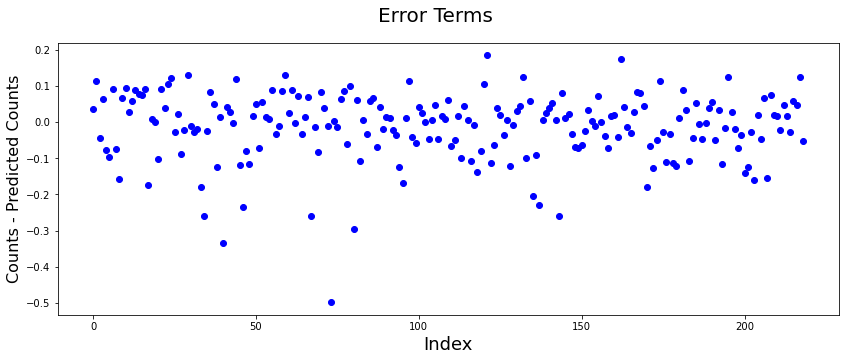

In [68]:
z = [i for i in range(0,len(y_test),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(z,y_test-y_test_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Counts - Predicted Counts', fontsize=16)             

#### _`Inference`_
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

### 8. Making Predictions

In [69]:
#Predict the values for test data
y_test_pred = lr.predict(X_test[col])

In [70]:
# Checking data before scaling
bike_df.head()

,instant,yr,holiday,workingday,atemp,hum,windspeed,cnt,weathersit_bad,weathersit_good,...,mnth_sept,season_spring,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,1,0,0,1,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,0,0,1,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,0,0,1,0
2,3,0,0,1,9.47025,43.7273,16.636703,1349,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,0,0,1,10.60610,59.0435,10.739832,1562,0,1,...,0,1,0,0,0,0,0,1,0,0
4,5,0,0,1,11.46350,43.6957,12.522300,1600,0,1,...,0,1,0,0,0,0,0,0,0,0


### 8.1 Intrepretting Final the Model

In [71]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it

lm = lr_model(col)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.1
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          2.11e-188
Time:                        02:25:26   Log-Likelihood:                 478.93
No. Observations:                 510   AIC:                            -933.9
Df Residuals:                     498   BIC:                            -883.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2937    

In [76]:
#r2_score Test Data
print(r2_score(y_train,y_train_pred),"r2_score Test Data ")
# r2_score Train Data
print(r2_score(y_test,y_test_pred), 'r2_score Train Data')

0.8373782509288216 r2_score Test Data 
0.7951923858103358 r2_score Train Data


### Interepretation of results

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- atemp
- windspeed
- Season
- months( September, October)
- Year
- Days (Monday ,Tuesday)
- weathersit( Light Snow, Mist + Cloudy) or (2,3)
- Season - Spring
- holiday